In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from calendar import month_name, day_name
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Data Info

In [2]:
hourly_df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter01/data/hour.csv',
                       index_col=0)
hourly_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
print('Shape', hourly_df.shape)

Shape (17379, 16)


In [4]:
hourly_df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [6]:
# Columns Renaming

hourly_df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour',
                          'holiday':'is_holiday', 'workingday':'is_workingday', 'hum':'humidity',
                         'cnt':'total'}, inplace=True)

In [7]:
df_copy = hourly_df.copy()

In [8]:
# changing date column datatype to datetime

df_copy.date = df_copy.date.astype(np.datetime64)

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17379 non-null  datetime64[ns]
 1   season         17379 non-null  int64         
 2   year           17379 non-null  int64         
 3   month          17379 non-null  int64         
 4   hour           17379 non-null  int64         
 5   is_holiday     17379 non-null  int64         
 6   weekday        17379 non-null  int64         
 7   is_workingday  17379 non-null  int64         
 8   weathersit     17379 non-null  int64         
 9   temp           17379 non-null  float64       
 10  atemp          17379 non-null  float64       
 11  humidity       17379 non-null  float64       
 12  windspeed      17379 non-null  float64       
 13  casual         17379 non-null  int64         
 14  registered     17379 non-null  int64         
 15  total          1737

In [10]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
year,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
month,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
is_holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
is_workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


In [11]:
## Grouping columns
time_features = ['date', 'season', 'year', 'month', 'hour', 'weekday', 'is_holiday', 'is_workingday']
weather_features = ['weathersit', 'temp', 'atemp', 'humidity', 'windspeed']
target_features = ['casual', 'registered', 'total']

## Data Preprocessing

In [12]:
day_name[:7]

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [13]:
months = month_name[1:13]
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
years = ['2011', '2012']
days = day_name[:7]            # ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days = [days[-1]] + days[:-1]  # ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [14]:
df_copy.season = df_copy.season.map(dict(zip(range(1,5), seasons)))
df_copy.month = df_copy.month.map(dict(zip(range(1, 13), months)))
df_copy.year = df_copy.year.map(dict(zip(range(2), years)))
df_copy.weekday = df_copy.weekday.map(dict(zip(range(7), days)))

In [15]:
weathers = ['Clear', 'Cloudy', 'Light_rain_snow', 'Heavy_rain_snow']

df_copy.weathersit = df_copy.weathersit.map(dict(zip(range(1,5), weathers)))

In [16]:
# changing humidity to percent and windspeed values to minimum (0) and maximum (67)

df_copy.windspeed = df_copy.windspeed * 67
df_copy.humidity = df_copy.humidity * 100

In [17]:
df_copy.loc[:, weather_features].sample(10, random_state=101)

,weathersit,temp,atemp,humidity,windspeed
instant,,,,,
5862,Cloudy,0.54,0.5152,88.0,26.0027
9674,Clear,0.14,0.1364,46.0,15.0013
4247,Clear,0.74,0.6515,33.0,12.9980
13348,Cloudy,0.70,0.6667,84.0,8.9981
13618,Clear,0.90,0.8788,47.0,16.9979
3482,Clear,0.66,0.5909,89.0,11.0014
12030,Light_rain_snow,0.58,0.5455,88.0,19.0012
393,Light_rain_snow,0.16,0.1515,80.0,12.9980
2146,Clear,0.42,0.4242,58.0,19.0012


In [18]:
df_copy.weathersit.value_counts()

Clear              11413
Cloudy              4544
Light_rain_snow     1419
Heavy_rain_snow        3
Name: weathersit, dtype: int64

## Registered Vs Casual Customers Analysis

### Univariate Analysis

In [19]:
## check the total rides is equal to sum of registered vs casual

(df_copy.registered + df_copy.casual == df_copy.total).all()

True

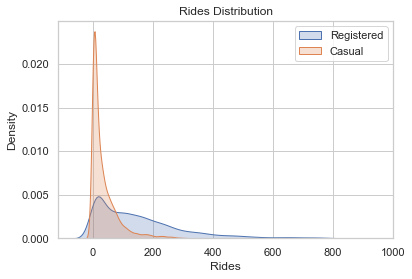

In [20]:
sns.set(font_scale=1.3)
sns.set_theme(style='whitegrid')
# g = sns.displot(data=df_copy, x='registered', kind='kde', fill=True)
# g = sns.displot(data=df_copy, x='casual', kind='kde', fill=True)

sns.kdeplot(data=df_copy, x='registered', shade=True, label='Registered')
sns.kdeplot(data=df_copy, x='casual', shade=True, label='Casual')

plt.xlabel('Rides')
plt.legend()
plt.title('Rides Distribution')

plt.show()

- Registered users perform way more rides than casual ones.
- Both distributions are right skewed, meaning most of the entries are small numbers of rides
- Data has some large number of rides, considered to be outliers

In [21]:
# set the date column to index
df_copy.set_index('date', inplace=True)

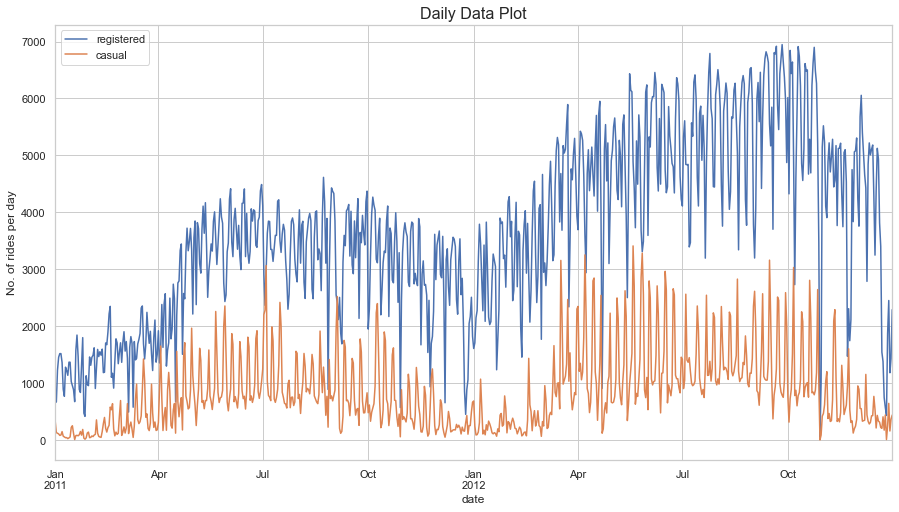

In [22]:
# daily data

data_per_day = df_copy.groupby('date')[['registered', 'casual']].sum()

data_per_day.plot(figsize=(15,8))
plt.ylabel('No. of rides per day')
plt.title('Daily Data Plot', fontdict={'size':16})
plt.show()

- Number of registered rides are always greater than casual rides.
- this data has some seasonality and trend in it. (need to check by TSA)
- During winter overall number of rides decreases (As it was expected)
- Both casual and registered rides has a lot of variance. We need to smoothen it.

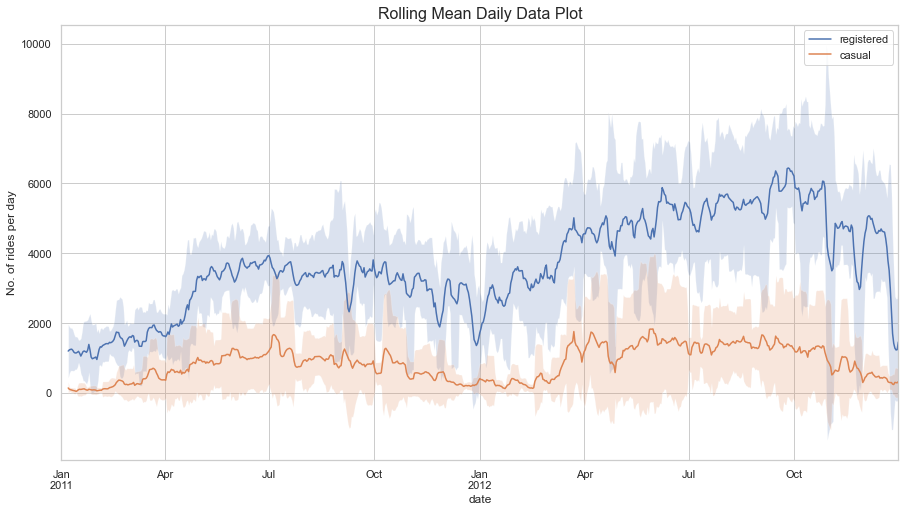

In [23]:
## Rolling mean of data

window = 7
rolling_means = data_per_day.rolling(window).mean()
rolling_stds = data_per_day.rolling(window).std()

ax = rolling_means.plot(figsize=(15, 8))
plt.fill_between(x=rolling_means.index, y1=rolling_means['registered']+2*rolling_stds['registered'],
                y2=rolling_means['registered']-2*rolling_stds['registered'], alpha=0.2)

plt.fill_between(x=rolling_means.index, y1=rolling_means['casual']+2*rolling_stds['casual'],
                y2=rolling_means['casual']-2*rolling_stds['casual'], alpha=0.2)


plt.ylabel('No. of rides per day')
plt.title('Rolling Mean Daily Data Plot', fontdict={'size':16})
plt.show()

### Hourly Analysis

In [24]:
df2 = df_copy[['hour', 'weekday', 'season', 'registered', 'casual']]
df2.head()

,hour,weekday,season,registered,casual
date,,,,,
2011-01-01,0,Saturday,Winter,13,3
2011-01-01,1,Saturday,Winter,32,8
2011-01-01,2,Saturday,Winter,27,5
2011-01-01,3,Saturday,Winter,10,3
2011-01-01,4,Saturday,Winter,1,0


In [25]:
df2 = df2.melt(id_vars=['hour', 'weekday', 'season'], var_name='user', value_name='rides')
df2.head()

,hour,weekday,season,user,rides
0,0,Saturday,Winter,registered,13
1,1,Saturday,Winter,registered,32
2,2,Saturday,Winter,registered,27
3,3,Saturday,Winter,registered,10
4,4,Saturday,Winter,registered,1


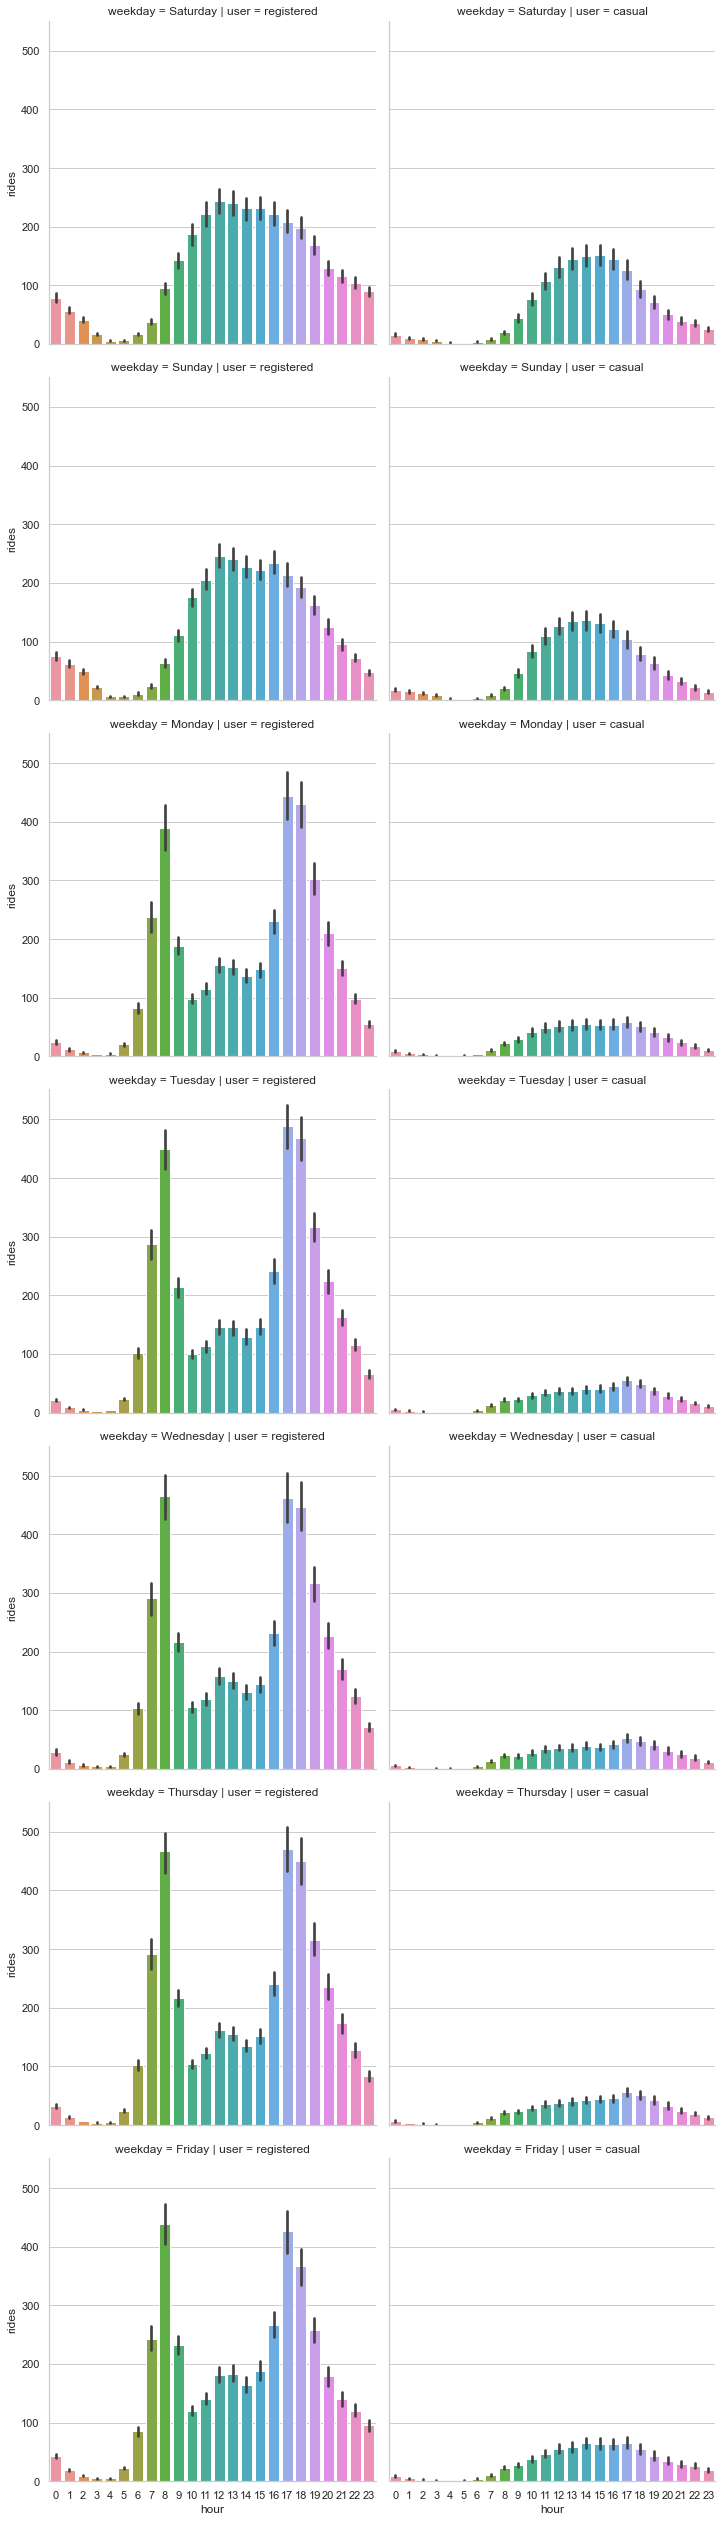

In [26]:
sns.catplot(data=df2, x='hour', y='rides', col='user', row='weekday', kind='bar')

plt.show()

- During working days most registered users use bike service before and after business hours. It is likely that most registered users use the bike sharing service for commuting.
- Casual users on working days are quite limited.
- Mostly casual users use bike sharing service on weekends.
- During weekends both casual and registered users have the same distribution between the time interval of 11 AM to 6 PM.

### Seasonal Impact

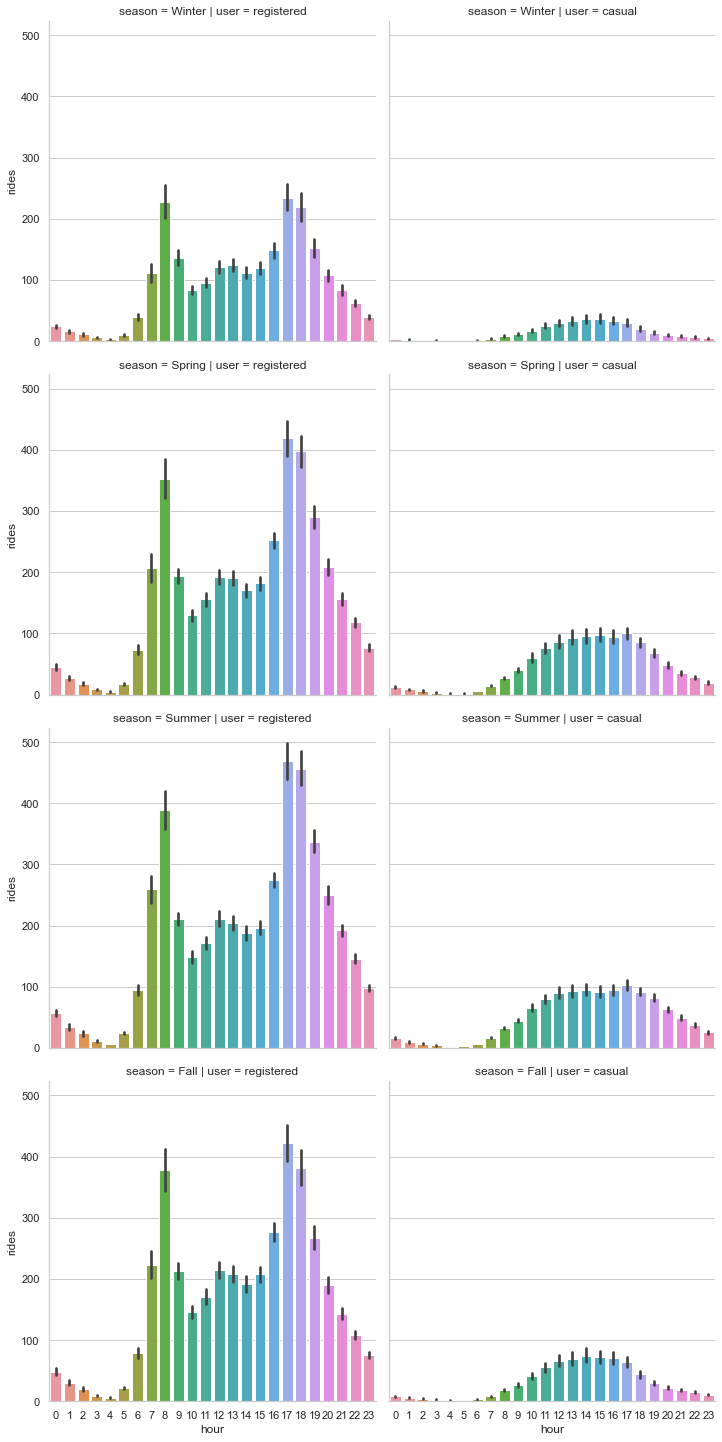

In [27]:
sns.catplot(data=df2, x='hour', y='rides', col='user', row='season', kind='bar')

plt.show()

- As expected there are fewer rides during winter season for both casual and registered users.

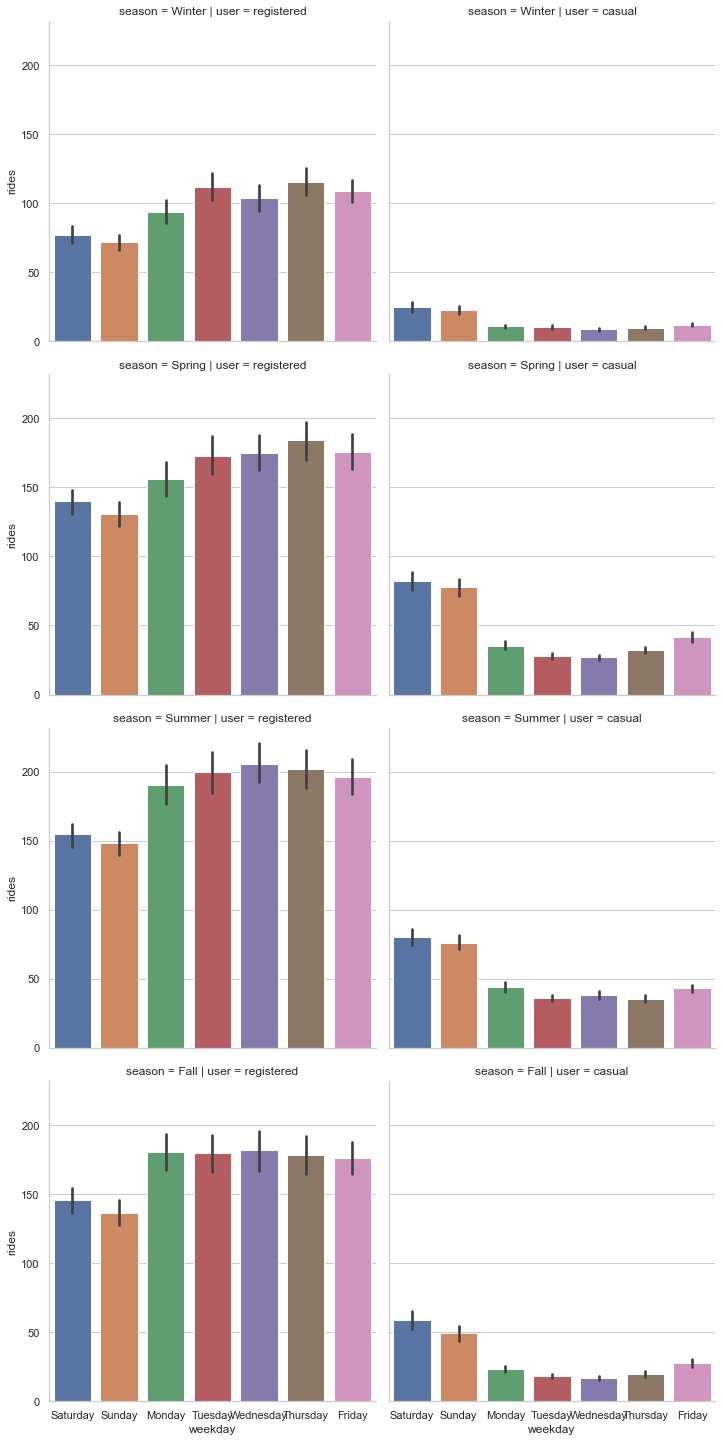

In [28]:
sns.catplot(data=df2, x='weekday', y='rides', col='user', row='season', kind='bar')

plt.show()

- Registered users use the bike sharing service more on weekdays than weekends.
- But casual user use it more in weekends than working days.

### Hypothesis Tests

$ 
    H_0 = \text{Average registered rides over weekdays is equal to average registered rides of weekends} \\
    H_a = \text{Opposite of } H_0
$

In [29]:
weekdays_data = df_copy.registered[~df_copy.weekday.isin(['Saturday', 'Sunday'])]
weekends_data = df_copy.registered[df_copy.weekday.isin(['Saturday', 'Sunday'])]

In [30]:
test_result = stats.ttest_ind(weekdays_data, weekends_data)

print(f"Test Statistic: {test_result[0]:.3f}")
print(f"P-value: {test_result[1]:.3f}")

Test Statistic: 16.004
P-value: 0.000


> p-value is less than 0.05, so we can reject the null hypothesis and conclude that there is difference between average registered rides during weekdays and weekends.

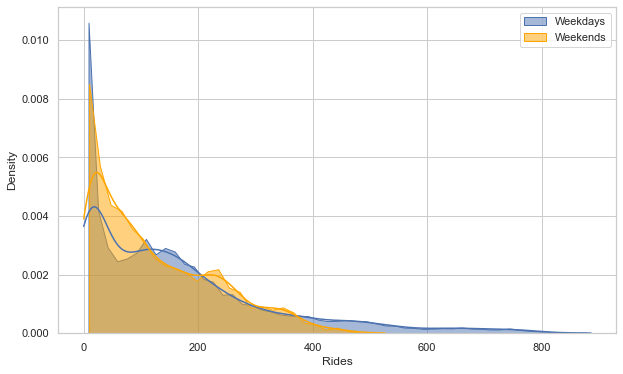

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data=weekdays_data, kde=True, stat='density', fill=True, element='poly', label='Weekdays')
sns.histplot(data=weekends_data, kde=True, stat='density', color='orange',
             fill=True, element='poly', label='Weekends', alpha=0.5)

plt.xlabel('Rides')
plt.legend()
plt.show()

$ 
    H_0 = \text{Average casual rides over weekdays is equal to average casual rides of weekends} \\
    H_a = \text{Opposite of } H_0
$

In [32]:
weekdays_data_casual = df_copy.casual[~df_copy.weekday.isin(['Saturday', 'Sunday'])]
weekends_data_casual = df_copy.casual[df_copy.weekday.isin(['Saturday', 'Sunday'])]

In [33]:
test_result = stats.ttest_ind(weekdays_data_casual, weekends_data_casual)

print(f"Test Statistic: {test_result[0]:.3f}")
print(f"P-value: {test_result[1]:.3f}")

Test Statistic: -41.077
P-value: 0.000


> p-value is less than 0.05, so we can reject the null hypothesis and conclude that there is difference between average casual rides during weekdays and weekends.

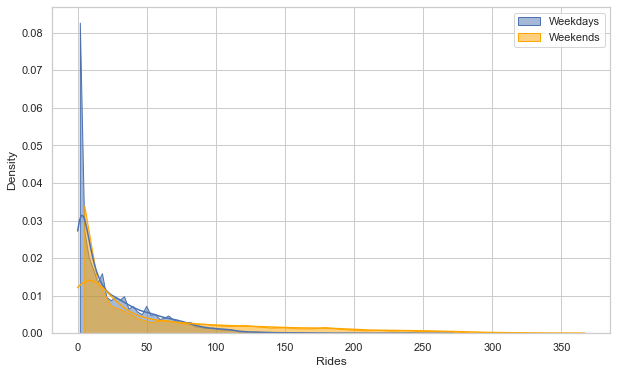

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data=weekdays_data_casual, kde=True, stat='density', fill=True, element='poly', label='Weekdays')
sns.histplot(data=weekends_data_casual, kde=True, stat='density', color='orange',
             fill=True, element='poly', label='Weekends', alpha=0.5)

plt.xlabel('Rides')
plt.legend()
plt.show()

- In conclusion, we can say that there is a statistically significant difference between the number of rides on working days and weekend days for both casual and registered customers.

### Analysis of Weather related features

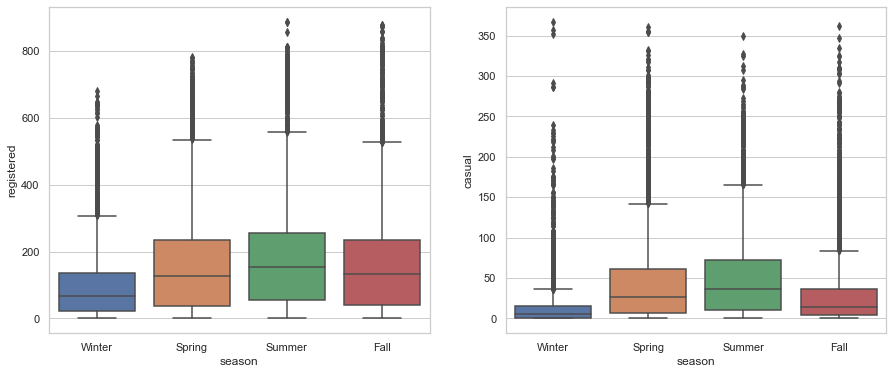

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

plt.sca(axs[0])
sns.boxplot(data=df_copy, x='season', y='registered')

plt.sca(axs[1])
sns.boxplot(data=df_copy, x='season', y='casual')

plt.show()

In [36]:
weather_features[1:]  # ['temp', 'atemp', 'humidity', 'windspeed']

['temp', 'atemp', 'humidity', 'windspeed']

In [37]:
weather_df = df_copy[weather_features+['registered', 'casual']]
weather_df.head()

,weathersit,temp,atemp,humidity,windspeed,registered,casual
date,,,,,,,
2011-01-01,Clear,0.24,0.2879,81.0,0.0,13,3
2011-01-01,Clear,0.22,0.2727,80.0,0.0,32,8
2011-01-01,Clear,0.22,0.2727,80.0,0.0,27,5
2011-01-01,Clear,0.24,0.2879,75.0,0.0,10,3
2011-01-01,Clear,0.24,0.2879,75.0,0.0,1,0


In [38]:
def plot_correlation(df, col):
    
    registered_corr = df['registered'].corr(df[col])
    casual_corr = df['casual'].corr(df[col])
    
    plt.figure(figsize=(12, 6))
    sns.regplot(data=df_copy, x=col, y='registered',
                label=f'Registered Rides correlation {registered_corr:.3f}',
                scatter_kws={'alpha':0.3})
    sns.regplot(data=df_copy, x=col, y='casual', 
                label=f'Casual Rides correlation {casual_corr:.3f}',
                scatter_kws={'alpha':0.3})
    
    plt.title(f"Correlation Between rides and {col}", fontdict={'size':16,'color':'red'})
    plt.legend()
    plt.show()


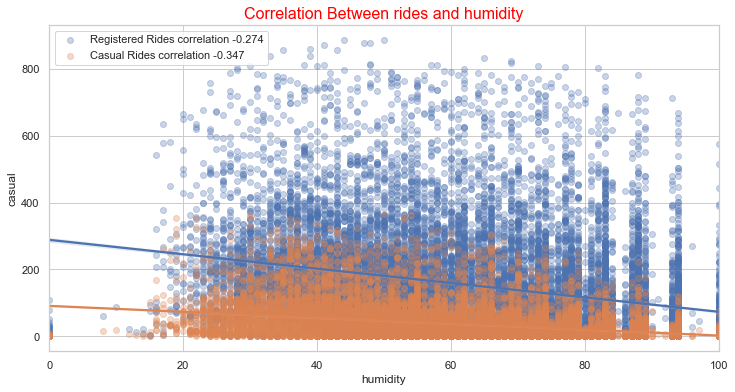

In [39]:
plot_correlation(df_copy, 'humidity')

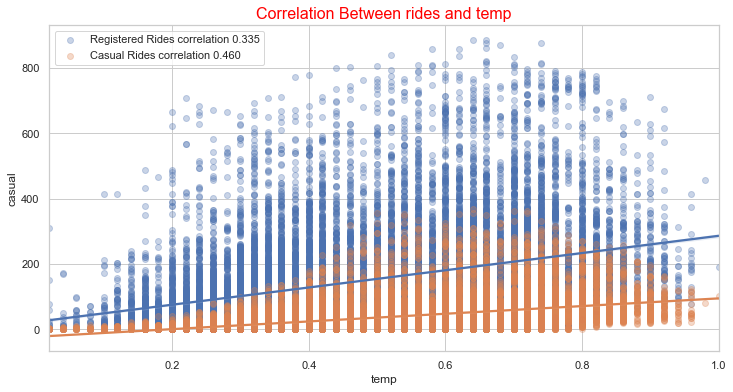

In [40]:
plot_correlation(df_copy, 'temp')

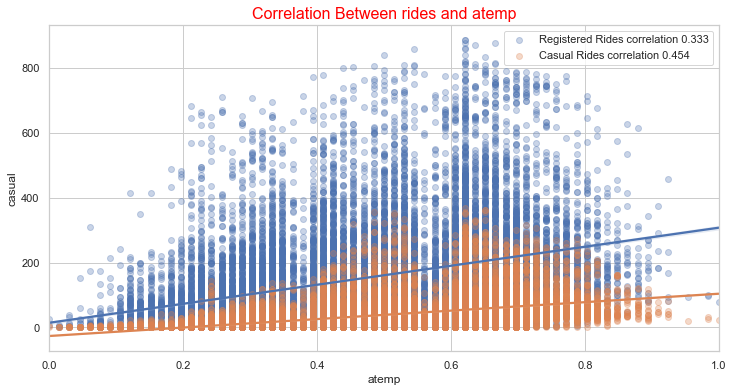

In [41]:
plot_correlation(df_copy, 'atemp')

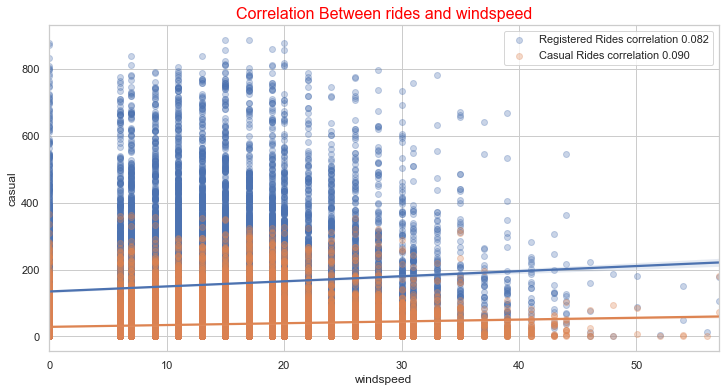

In [42]:
plot_correlation(df_copy, 'windspeed')

We can observe that higher temperatures have a positive impact on the number of rides.

> Note that as the values in the registered column are widely spread with respect to the different values in temp, we have a lower correlation compared to the casual column. The same pattern can be observed in the humidity level has a negative correlation with both types of rides. This means that with a high level of humidity (mist or rain), customers will tend not to use the bike sharing service. There is minimal correlation between the number of rides and the wind speed (a weak positive correlation).

One of the major drawbacks of the correlation coefficient is its assumption of a linear relationship between the two random variables. This is quite a strong assumption as, most of the time, relationships in nature are not linear. A measure that generalizes the Pearson's correlation to monotonic relationships between two variables is the Spearman rank correlation.

### Correlations

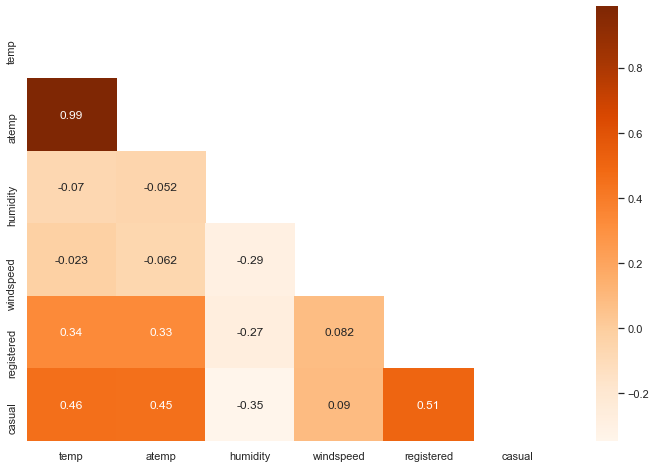

In [44]:
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'registered', 'casual']

corr_matrix = df_copy[cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2g', cmap='Oranges', mask=np.triu(corr_matrix))

plt.show()

### Time series analysis

In [45]:
from statsmodels.tsa.stattools import adfuller

In [50]:
daily_rides = df_copy[['registered', 'casual']].resample('D').sum()
daily_rides.head()

,registered,casual
date,,
2011-01-01,654,331
2011-01-02,670,131
2011-01-03,1229,120
2011-01-04,1454,108
2011-01-05,1518,82


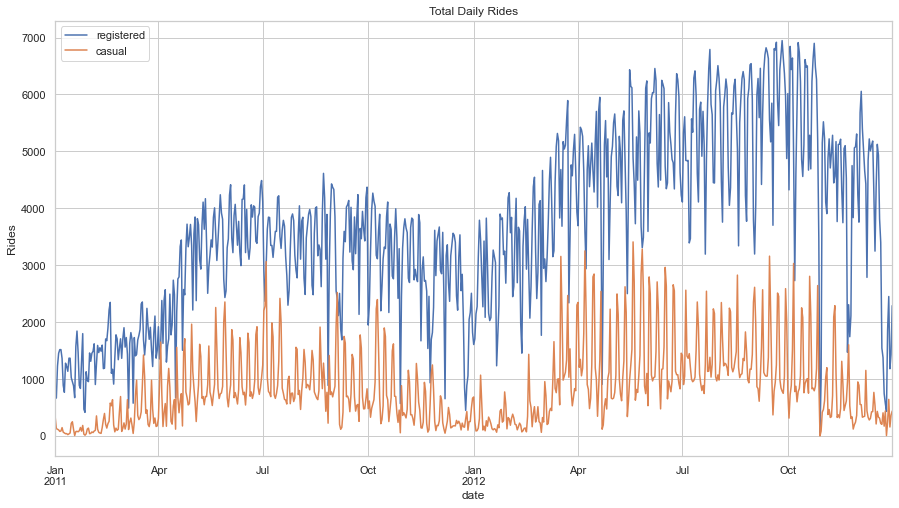

In [54]:
daily_rides.plot(figsize=(15, 8))
plt.ylabel('Rides')
plt.title("Total Daily Rides")
plt.show()

In [56]:
## Stationarity Test

result_registered = adfuller(daily_rides.registered)
result_casual = adfuller(daily_rides.casual)

print("Rigistered Rides' p-value", result_registered[1])
print("Casual Rides' p-value", result_casual[1])

Rigistered Rides' p-value 0.3554187954361645
Casual Rides' p-value 0.37191442532530544


- For both registered and casual users p-value is greater than 0.5, so we cannot reject the null hypothesis. It means they are non - stationary.